In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




/var/folders/qb/6z9ymjy12tn76pc_hnjqtsyh0000gn/T/ipykernel_2530/448802057.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(crosstab["Yes"][i] + 1, i + width/2, f"{crosstab['Yes'][i]:.1f}%", va='center', fontsize=10)
/var/folders/qb/6z9ymjy12tn76pc_hnjqtsyh0000gn/T/ipykernel_2530/448802057.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(crosstab["No"][i] + 1, i - width/2, f"{crosstab['No'][i]:.1f}%", va='center', fontsize=10)
/var/folders/qb/6z9ymjy12tn76pc_hnjqtsyh0000gn/T/ipykernel_2530/448802057.py:39: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  plt.tight_layout()
/U

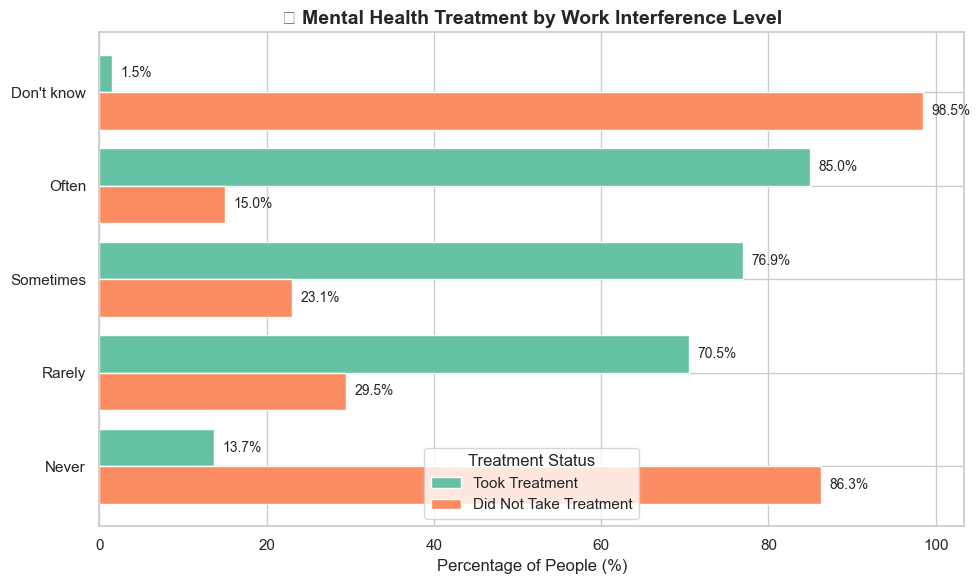

In [7]:

# Load and preprocess
df = pd.read_csv('/Users/adityachawla/Desktop/mental_health_predictor/HealthSurvey.csv')
df = df[(df["Age"] >= 18) & (df["Age"] <= 65)]
df["work_interfere"] = df["work_interfere"].fillna("Don't know")

# Sort categories logically
category_order = ["Never", "Rarely", "Sometimes", "Often", "Don't know"]
df["work_interfere"] = pd.Categorical(df["work_interfere"], categories=category_order, ordered=True)

# Crosstab (not normalized for grouped plot)
crosstab = pd.crosstab(df["work_interfere"], df["treatment"], normalize='index') * 100
crosstab = crosstab[["Yes", "No"]]  # Ensure column order

# Set style and colors
sns.set(style="whitegrid")
colors = sns.color_palette("Set2")

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.4
x = range(len(crosstab))

# Plot Yes and No bars side by side horizontally
ax.barh([i + width/2 for i in x], crosstab["Yes"], height=width, label="Took Treatment", color=colors[0])
ax.barh([i - width/2 for i in x], crosstab["No"], height=width, label="Did Not Take Treatment", color=colors[1])

# Labels & Titles
ax.set_yticks(x)
ax.set_yticklabels(crosstab.index, fontsize=11)
ax.set_xlabel("Percentage of People (%)", fontsize=12)
ax.set_title("🧠 Mental Health Treatment by Work Interference Level", fontsize=14, weight='bold')
ax.legend(title="Treatment Status")

# Add percentage labels on bars
for i in x:
    ax.text(crosstab["Yes"][i] + 1, i + width/2, f"{crosstab['Yes'][i]:.1f}%", va='center', fontsize=10)
    ax.text(crosstab["No"][i] + 1, i - width/2, f"{crosstab['No'][i]:.1f}%", va='center', fontsize=10)

plt.tight_layout()
plt.show()


# "Why is the treatment rate for people who said 'Never' higher than for those who said 'Don't know'? Shouldn't 'Never' be lower because they’re confident they don’t have a problem?"


# 1. Uncertainty ≠ Denial
# People who answered “Don’t know” might be:

# In denial

# Unaware of their symptoms

# Not educated about mental health

# These people may not seek help because they don’t even realize they need it.

# 2. "Never" group may have other stress factors
# Some in the "Never" group might:

# Be proactive about mental health

# Seek treatment for personal issues not affecting work

# So, their reason for treatment is outside of work interference.



# 3. Data noise / misunderstanding
# Surveys can have interpretation errors:

# One person’s “Never” could mean “rarely but not much”

# “Don’t know” could mean “I don’t want to say”

# Not everyone interprets questions consistently.



Age Distribution with Treatment Status (Overlaid KDE Plot)

🔹 People who TOOK treatment:
Count: 631
Mean Age: 32.55
Most Common Age Range: [32]
Age Range: 18 - 61

🔹 People who DID NOT take treatment:
Count: 619
Mean Age: 31.53
Most Common Age Range: [29]
Age Range: 18 - 65



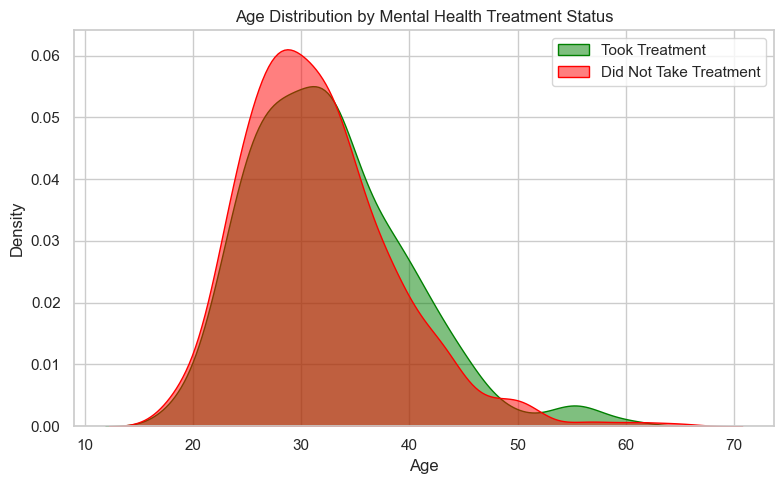

In [8]:
# Load and filter data
# Filter dataset to include people aged 18 to 65
df = df[(df["Age"] >= 18) & (df["Age"] <= 65)]

# Separate data into two groups
took_treatment = df[df["treatment"] == "Yes"]
did_not_take_treatment = df[df["treatment"] == "No"]

# -------------------------------
# ✅ Print Insightful Statistics
# -------------------------------

print("🔹 People who TOOK treatment:")
print(f"Count: {len(took_treatment)}")
print(f"Mean Age: {took_treatment['Age'].mean():.2f}")
print(f"Most Common Age Range: {took_treatment['Age'].mode().values}")
print(f"Age Range: {took_treatment['Age'].min()} - {took_treatment['Age'].max()}")
print()

print("🔹 People who DID NOT take treatment:")
print(f"Count: {len(did_not_take_treatment)}")
print(f"Mean Age: {did_not_take_treatment['Age'].mean():.2f}")
print(f"Most Common Age Range: {did_not_take_treatment['Age'].mode().values}")
print(f"Age Range: {did_not_take_treatment['Age'].min()} - {did_not_take_treatment['Age'].max()}")
print()

# -----------------------------------
# ✅ KDE Plot - Age Distribution
# -----------------------------------

plt.figure(figsize=(8, 5))

sns.kdeplot(data=took_treatment, x="Age", label="Took Treatment", fill=True, color="green", alpha=0.5)
sns.kdeplot(data=did_not_take_treatment, x="Age", label="Did Not Take Treatment", fill=True, color="red", alpha=0.5)

plt.title("Age Distribution by Mental Health Treatment Status")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()




# 🧠 Insights From This Graph:
# ✅ Most responses came from people aged ~25–35.
# (That’s where the highest peaks are.)

# 🟢 In the 30–45 range, green dominates → more likely to take treatment.

# 🔴 In the early 20s, red slightly dominates → more avoiding treatment (despite being aware).

# 🧓 50+ age group:

# Sparse data (low density).

# Green still present → some older people do seek help (but fewer in number).



/var/folders/qb/6z9ymjy12tn76pc_hnjqtsyh0000gn/T/ipykernel_2530/1323562105.py:47: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/qb/6z9ymjy12tn76pc_hnjqtsyh0000gn/T/ipykernel_2530/1323562105.py:47: UserWarning: Glyph 128106 (\N{FAMILY}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/qb/6z9ymjy12tn76pc_hnjqtsyh0000gn/T/ipykernel_2530/1323562105.py:47: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  plt.tight_layout()
/Users/adityachawla/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/adityachawla/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128106 (\N{FAMILY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/adityachawla/Library/Python/3.9/lib/python/site-packages/IPython/cor

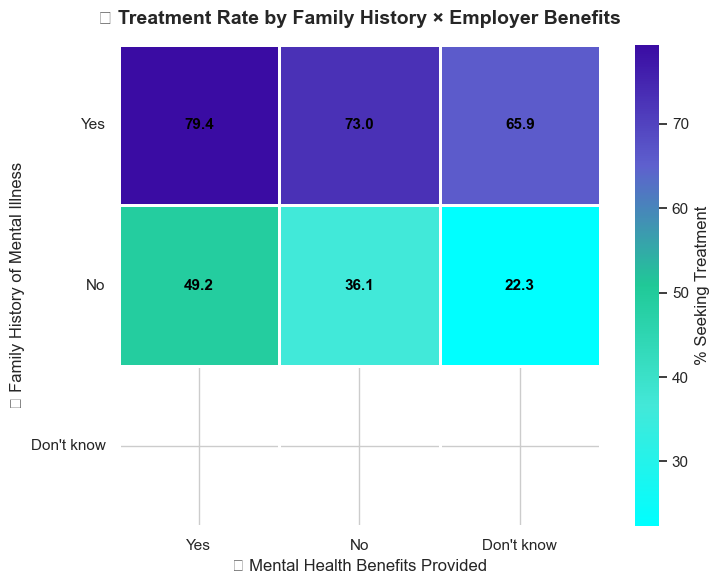


🔝 Highest treatment group: ('Yes', 'Yes') 79.4%
🔻 Lowest treatment group: ('No', "Don't know") 22.3%


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Load and filter data
df = pd.read_csv("/Users/adityachawla/Desktop/mental_health_predictor/HealthSurvey.csv")
df = df[(df["Age"] >= 18) & (df["Age"] <= 65)]
df["benefits"] = df["benefits"].fillna("Don't know")
df["family_history"] = df["family_history"].fillna("Don't know")

# Category order for axis consistency
row_order = ["Yes", "No", "Don't know"]
col_order = ["Yes", "No", "Don't know"]

# Pivot: % who took treatment
pivot = (
    pd.crosstab(df["family_history"],
                df["benefits"],
                values=df["treatment"],
                aggfunc=lambda x: (x == "Yes").mean() * 100)
    .reindex(index=row_order, columns=col_order)
)

# 🎨 Cyan to Viridis-like colormap
colors = ["#00FFFF", "#43e8d8", "#20c997", "#5e60ce", "#3a0ca3"]
cmap = LinearSegmentedColormap.from_list("CyanViridis", colors)

# 📊 Heatmap Plot
plt.figure(figsize=(8, 6))
sns.heatmap(pivot,
            annot=True,
            fmt=".1f",
            cmap=cmap,
            linewidths=0.8,
            linecolor="white",
            square=True,
            cbar_kws={"label": "% Seeking Treatment"},
            annot_kws={"fontsize": 11, "weight": "bold", "color": "black"})

# 🎯 Labels and Title
plt.title("🧠 Treatment Rate by Family History × Employer Benefits", fontsize=14, weight='bold', pad=15)
plt.xlabel("💼 Mental Health Benefits Provided", fontsize=12)
plt.ylabel("👪 Family History of Mental Illness", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11, rotation=0)
plt.tight_layout()
plt.show()

# 🔍 Optional printed insights
print("\n🔝 Highest treatment group:", pivot.stack().idxmax(), f"{pivot.max().max():.1f}%")
print("🔻 Lowest treatment group:", pivot.stack().idxmin(), f"{pivot.min().min():.1f}%")


In [ ]:
HealthSurvey.csv

TypeError: agg function failed [how->mean,dtype->object]

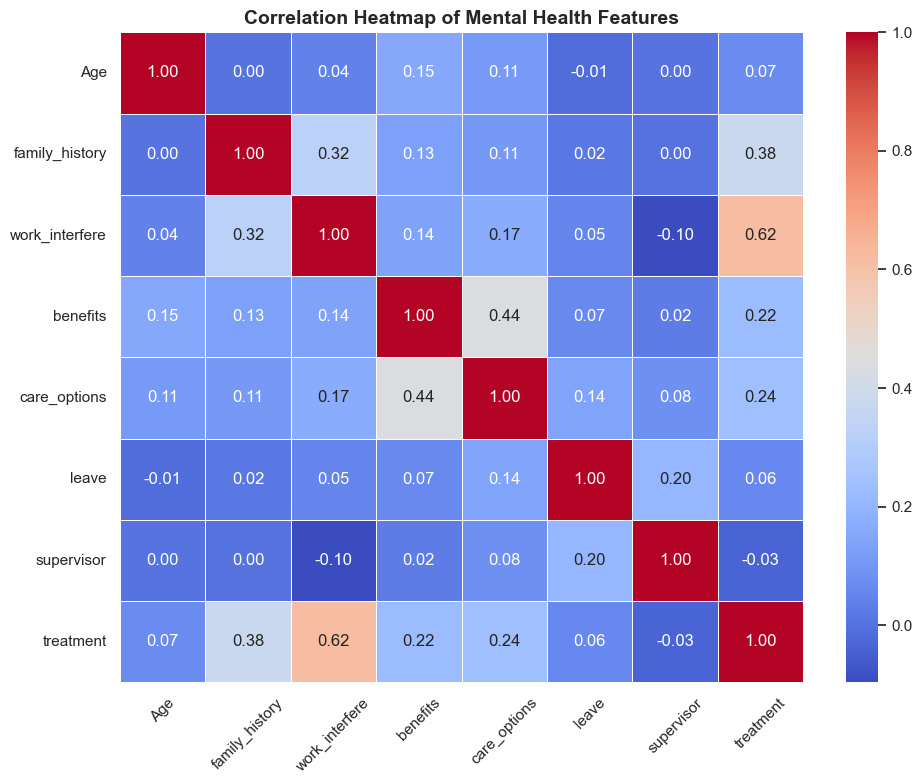

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 1. Load data
df = pd.read_csv("/Users/adityachawla/Desktop/mental_health_predictor/HealthSurvey.csv")

# 2. Preprocess data
df = df.drop(["comments", "state", "Timestamp"], axis=1, errors="ignore")
df = df[(df["Age"] >= 18) & (df["Age"] <= 65)]
df.fillna({"self_employed": "No", "work_interfere": "Don't know"}, inplace=True)

# 3. Select features
features = [
    "Age", "family_history", "work_interfere", "benefits",
    "care_options", "leave", "supervisor", "treatment"
]
df = df[features]

# 4. Encode categorical variables
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# 5. Compute correlation matrix
corr_matrix = df.corr()

# 6. Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Mental Health Features", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
